In [4]:
#Logistic Regression as a method for Classification
    #Examples of classification problems: spam vs Ham emails, Loan Defaults, Disease Diagnosis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#STEP-1 Review(Visualize) and clean data
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


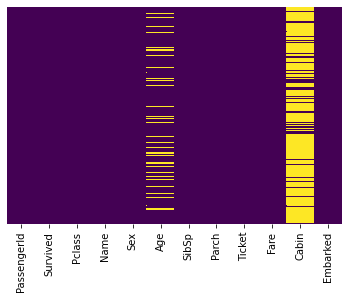

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
sns.set_style('whitegrid')

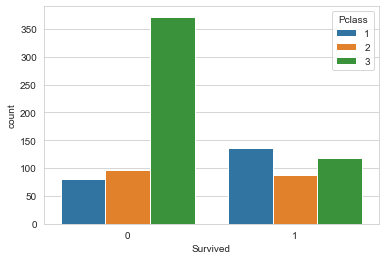

In [13]:
# sns.countplot(x='Survived', hue='Sex', data=train) #mostly women are in the survival group, mostly men didnt survive

sns.countplot(x='Survived', hue='Pclass', data=train)

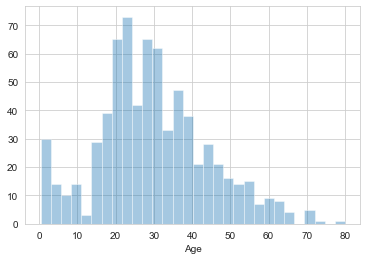

In [14]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30) #Age distribution 

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


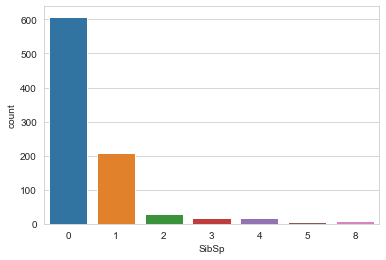

In [16]:
sns.countplot(x='SibSp', data=train)#sibiling vs spouses on board

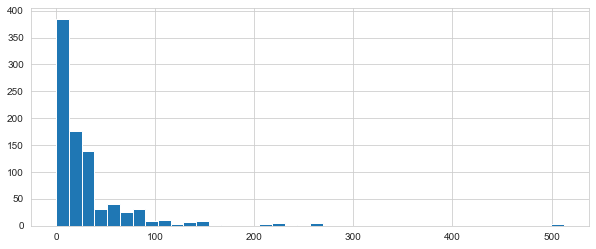

In [20]:
train['Fare'].hist(bins=40, figsize=(10, 4))

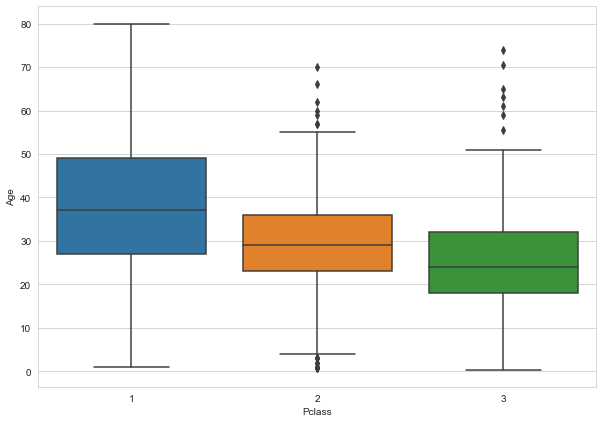

In [23]:
#figure shows first class are most likely to be older 
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [27]:
# fill in the missing age data, based on the class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24
    else: 
        return Age

In [28]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)#apply to the columns

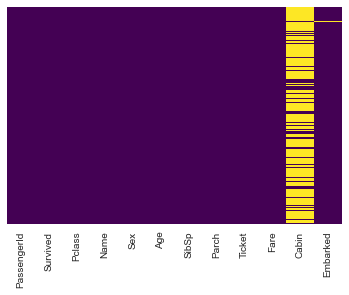

In [29]:
#heatmap shows that age column has been filled out(yellow strips in cabin represent missing info).
    #Drop the cabin column because its too much missing info to fill out/guess
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [31]:
train.drop('Cabin', axis=1, inplace= True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


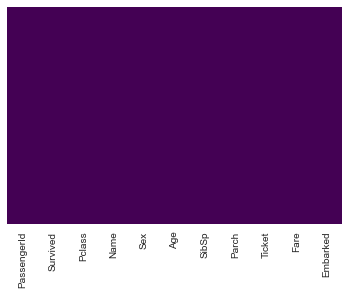

In [34]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [33]:
#drop any more missing data
train.dropna(inplace=True)

In [36]:
#Step 2 - Change categories(e.g, sex- m,f, and embarked column) into a numerical representation of data
    #Dummy variable is fed to ml algorithm
        #drop_first to avoid multicolirity 
pd.get_dummies(train['Sex'])
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [37]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [38]:
#repeat for the embark column
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
train = pd.concat([train,sex,embark], axis=1)

In [41]:
train.head(2)#new columns male,q,s for our ml

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [42]:
#drop columns not being used
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [43]:
train.drop('PassengerId', axis=1, inplace=True)#same as the index, of no use

In [44]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [48]:
#STEP 3 - Train and use a model to predict the classes of passenger surviver on the titanic
X = train.drop('Survived', axis=1)
y = train['Survived']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
# Model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [51]:
logmodel.fit(X_train, y_train)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
#Test the model
predictions = logmodel.predict(X_test)

In [53]:
#For Classification Task, use classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

